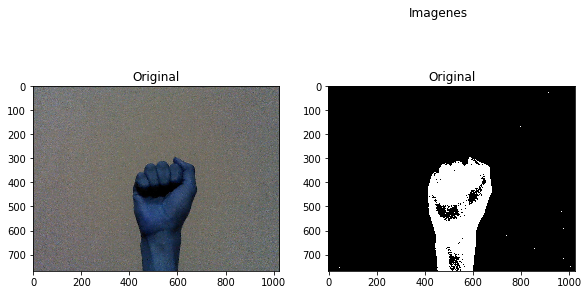

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Ej/ex2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.figure(1,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(thresh, cmap=plt.cm.gray), plt.title('Original')
plt.show()

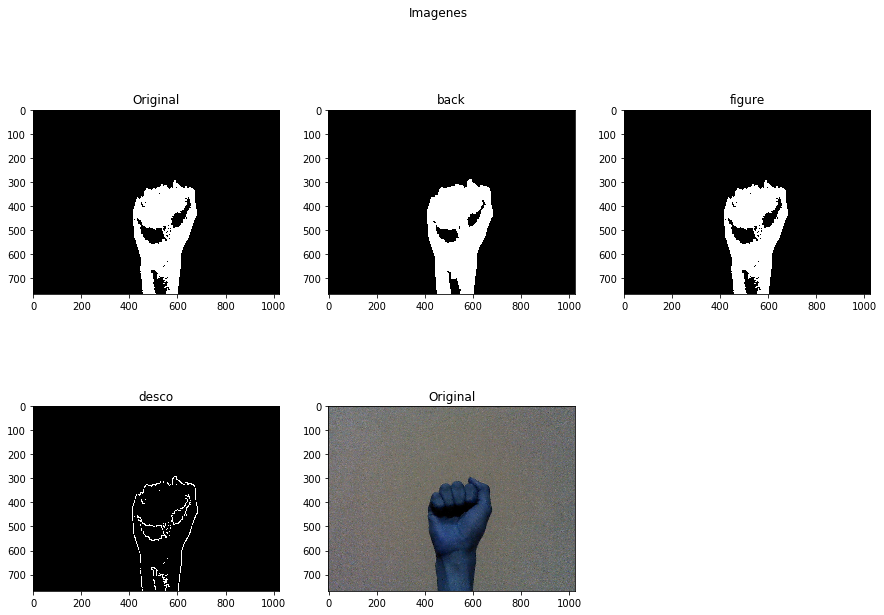

In [100]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure(1,figsize=(15,10))
plt.suptitle("Imagenes")
plt.subplot(231), plt.imshow(opening,cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(sure_bg, cmap=plt.cm.gray), plt.title('back')
plt.subplot(233), plt.imshow(sure_fg, cmap=plt.cm.gray), plt.title('figure')
plt.subplot(234), plt.imshow(unknown, cmap=plt.cm.gray), plt.title('desco')
plt.subplot(235), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.show()

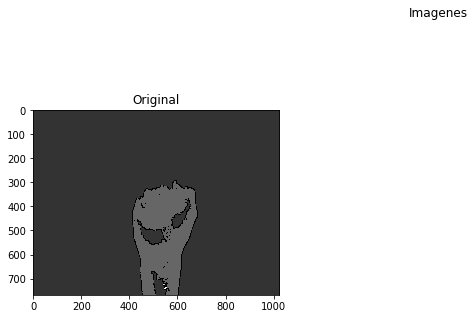

In [101]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.figure(1,figsize=(15,10))
plt.suptitle("Imagenes")
plt.subplot(231), plt.imshow(markers,cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(232), plt.imshow(sure_bg, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(233), plt.imshow(sure_fg, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(234), plt.imshow(unknown, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(235), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.show()

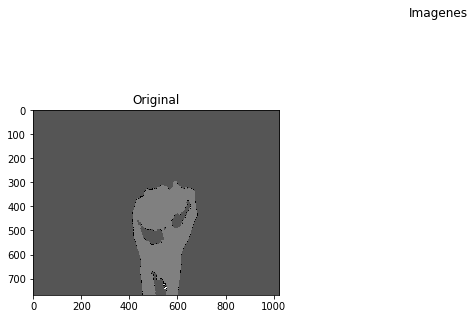

In [102]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.figure(1,figsize=(15,10))
plt.suptitle("Imagenes")
plt.subplot(231), plt.imshow(markers,cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(232), plt.imshow(sure_bg, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(233), plt.imshow(sure_fg, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(234), plt.imshow(unknown, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(235), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2

# Test scipy version, since active contour is only possible
# with recent scipy version
import scipy


img = cv2.imread('Ej/ex2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T


snake = active_contour(gaussian(img, 3),init, alpha=0.015, beta=10, gamma=0.001)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

ValueError: invalid literal for int() with base 10: '0rc2'

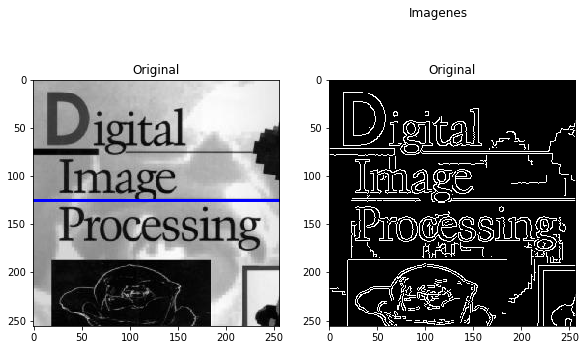

In [20]:
import cv2
import numpy as np

img = cv2.imread('Ej/libro.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,10,10)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.figure(1,figsize=(15,10))
plt.suptitle("Imagenes")
plt.subplot(231), plt.imshow(img,cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(edges, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(233), plt.imshow(sure_fg, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(234), plt.imshow(unknown, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(235), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.show()

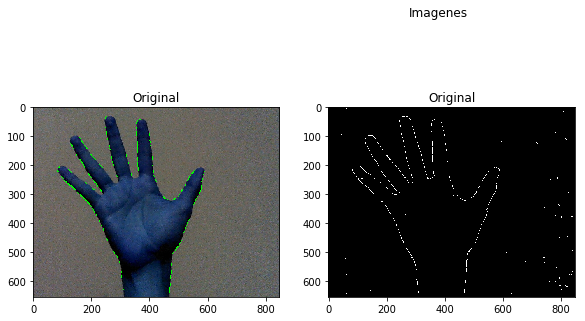

In [103]:
import cv2
import numpy as np

img = cv2.imread('Ej/ex1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200,apertureSize = 3)


minLineLength = 100
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.figure(1,figsize=(15,10))
plt.suptitle("Imagenes")
plt.subplot(231), plt.imshow(img,cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(edges, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(233), plt.imshow(sure_fg, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(234), plt.imshow(unknown, cmap=plt.cm.gray), plt.title('Original')
#plt.subplot(235), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.show()